In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Creates the antecedents, or inputs, to decide the most efficient solution.
risk = ctrl.Antecedent(np.arange(0, 101, 1), 'risk')            # Risk of the generated action
time = ctrl.Antecedent(np.arange(0, 101, 1), 'time')            # Time to execute the action
energy = ctrl.Consequent(np.arange(0, 101, 1), 'energy')        # Considers the current energy of the system.
complexity = ctrl.Consequent(np.arange(0, 101, 1), 'complexity')# 
impact = ctrl.Consequent(np.arange(0, 101, 1), 'impact')        # How much it would affect the mission

# Output variable to decide the best course of action, the fuzzy set of each action depends on the State (S) of the system
action = ctrl.Consequent(np.arange(0, 11, 1), 'action')

In [31]:
# Fuzzy sets for input variables, the sets are splitted in 3 different categories which are (low, medium, high)
risk.automf(3, variable_type='quantity')
time.automf(3, 'quantity')
energy.automf(3, 'quantity', invert=True)
complexity.automf(3, 'quantity')
impact.automf(3, 'quantity')

In [27]:
# Create the possible actions for each state S
def actions(state):
    action.terms = {} # Clear the terms
    if state == "S1": # Normal
        action['remain_normal'] = fuzz.trapmf(action.universe, [0, 0, 8, 10])
        action['emergency_landing'] = fuzz.trapmf(action.universe, [9, 9, 10, 10])
        return 
    elif state == "S2": # GPS Spoofing
        action['restore_attack'] = fuzz.trimf(action.universe, [0, 0, 3])
        action['change_route'] = fuzz.trimf(action.universe, [1, 3, 5])
        action['activate_redundancy'] = fuzz.trimf(action.universe, [3, 5, 7])
        action['use_occupancy_maps'] = fuzz.trimf(action.universe, [5, 7, 9])
        action['emergency_landing'] = fuzz.trimf(action.universe, [7, 10, 10])
        return
    elif state == "S3": # Jamming GPS
        action['change_altitude'] = fuzz.trimf(action.universe, [0, 0, 3])
        action['restore_system'] = fuzz.trapmf(action.universe, [1, 4, 5, 7])
        action['activate_redundancy'] = fuzz.trapmf(action.universe, [3, 6, 7, 9])
        action['emergency_landing'] = fuzz.trimf(action.universe, [7, 10, 10])
        return
    elif state == "S4": # Engine
        action['activate_redundancy'] = fuzz.trapmf(action.universe, [0, 0, 4, 6])
        action['emergency_landing'] = fuzz.trapmf(action.universe, [4 ,7, 10, 10])
    elif state == "S5": # Aileron or elevator
        action['change_altitude'] = fuzz.trapmf(action.universe, [0, 0, 4, 6])
        action['emergency_landing'] = fuzz.trapmf(action.universe, [4 ,7, 10, 10])
        return
    elif state == "S6": # Rudder
        action['navigation_adjustment'] = fuzz.trapmf(action.universe, [0, 0, 4, 6])
        action['emergency_landing'] = fuzz.trapmf(action.universe, [4 ,7, 10, 10])
        return

In [28]:
# Create the rules for the fuzzy system
def rules(state):
    if state == "S1": # Normal
        return [
            ctrl.Rule(risk['high'] & complexity['high'] & energy['low'], action['emergency_landing']),
        ]
    elif state == "S2": # GPS Spoofing
        return [
            ctrl.Rule(risk['low'] & impact['low']) & complexity['low'], action['restore_attack']),
        ]
    elif state == "S3":
        return

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3674441301.py, line 5)

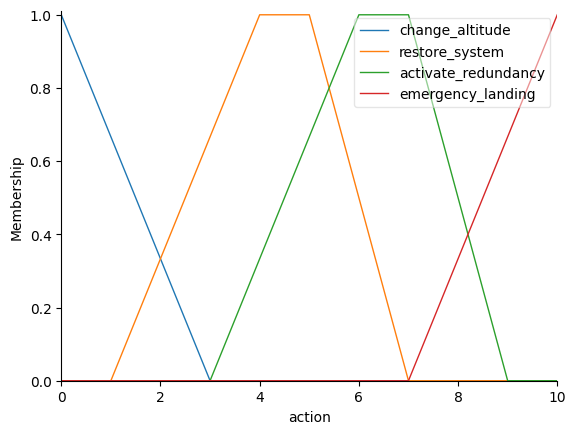

In [26]:
action.terms = {}
action['change_altitude'] = fuzz.trimf(action.universe, [0, 0, 3])
action['restore_system'] = fuzz.trapmf(action.universe, [1, 4, 5, 7])
action['activate_redundancy'] = fuzz.trapmf(action.universe, [3, 6, 7, 9])
action['emergency_landing'] = fuzz.trimf(action.universe, [7, 10, 10])
action.view()